# 主题建模 LDA  无监督机器学习

In [2]:
%matplotlib inline
from __future__ import print_function
from wordcloud import WordCloud
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the data
corpus = corpora.BleiCorpus('D:/program/cjc2016/ap/ap.dat', 'D:/program/cjc2016/ap/vocab.txt')

In [5]:
corpus

In [6]:
' '.join(dir(corpus))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __iter__ __len__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _load_specials _save_specials _smart_save docbyoffset fname id2word index length line2doc load save save_corpus serialize'

In [7]:
corpus.id2word.items()[0:10]  #给每一词对应一个数字id

[(0, u'i'),
 (1, u'new'),
 (2, u'percent'),
 (3, u'people'),
 (4, u'year'),
 (5, u'two'),
 (6, u'million'),
 (7, u'president'),
 (8, u'last'),
 (9, u'government')]

# Build the topic model

In [8]:
NUM_TOPICS = 100

In [9]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

In [10]:
corpus.id2word

{0: u'i',
 1: u'new',
 2: u'percent',
 3: u'people',
 4: u'year',
 5: u'two',
 6: u'million',
 7: u'president',
 8: u'last',
 9: u'government',
 10: u'years',
 11: u'first',
 12: u'police',
 13: u'state',
 14: u'states',
 15: u'officials',
 16: u'soviet',
 17: u'united',
 18: u'bush',
 19: u'time',
 20: u'three',
 21: u'billion',
 22: u'today',
 23: u'national',
 24: u'told',
 25: u'american',
 26: u'thursday',
 27: u'federal',
 28: u'house',
 29: u'week',
 30: u'court',
 31: u'day',
 32: u'tuesday',
 33: u'made',
 34: u'news',
 35: u'wednesday',
 36: u'monday',
 37: u'friday',
 38: u'say',
 39: u'company',
 40: u'city',
 41: u'party',
 42: u'just',
 43: u'group',
 44: u'york',
 45: u'market',
 46: u'report',
 47: u'department',
 48: u'military',
 49: u'south',
 50: u'union',
 51: u'members',
 52: u'home',
 53: u'west',
 54: u'political',
 55: u'reported',
 56: u'make',
 57: u'going',
 58: u'office',
 59: u'get',
 60: u'spokesman',
 61: u'dont',
 62: u'world',
 63: u'like',
 64: u'four

In [11]:
' '.join(dir(model))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _apply _load_specials _save_specials _smart_save alpha bound chunksize clear decay dispatcher distributed do_estep do_mstep eta eval_every expElogbeta gamma_threshold get_document_topics get_topic_terms id2word inference init_dir_prior iterations load log_perplexity minimum_probability num_terms num_topics num_updates numworkers offset optimize_alpha optimize_eta passes print_topic print_topics save show_topic show_topics state sync_state top_topics update update_alpha update_eta update_every'

# We can see the list of topics a document refers to 

In [12]:
document_topics = [model[c] for c in corpus]

In [13]:
# how many topics does one document cover?
document_topics[2]   #第三篇文本的主题，每个数字对应一个topic，后面那个是权重

[(0, 0.038522921984906922),
 (15, 0.68898829532983663),
 (39, 0.11490295398972712),
 (45, 0.023837377436549366),
 (58, 0.03854815227426156),
 (68, 0.026864759806301899),
 (73, 0.017953532812042521),
 (80, 0.010542081617143755),
 (90, 0.018025539156050235)]

In [14]:
# The first topic
# format: weight, term
model.show_topic(0, 10)  #第一个topic，按权重排序，最重要的10个词

[(u'dumps', 0.010054023893473136),
 (u'two', 0.0077945727313409787),
 (u'communist', 0.0056440532231941997),
 (u'dump', 0.0052788625905504103),
 (u'people', 0.0048389362505757453),
 (u'year', 0.0046832712869369839),
 (u'leader', 0.0044774478984111275),
 (u'police', 0.0044541394084494229),
 (u'officials', 0.0042739052425826724),
 (u'annie', 0.0041695195948526593)]

In [15]:
# The 100 topic
# format: weight, term
model.show_topic(99, 10)

[(u'government', 0.011901938258531579),
 (u'y', 0.0066026131614193495),
 (u'agreement', 0.0065958218470270596),
 (u'engineering', 0.0047620882472850876),
 (u'plants', 0.0046685217941137879),
 (u'percent', 0.0046558629594159566),
 (u'default', 0.0045759780719792087),
 (u'two', 0.0044078228592084514),
 (u'controls', 0.004294246085694179),
 (u'considerations', 0.0036920926007048905)]

In [16]:
words = model.show_topic(0, 5)
words

[(u'dumps', 0.010054023893473136),
 (u'two', 0.0077945727313409787),
 (u'communist', 0.0056440532231941997),
 (u'dump', 0.0052788625905504103),
 (u'people', 0.0048389362505757453)]

In [17]:
model.show_topics(4)  #四个topic，每个topic下的词语，权重

[(94,
  u'0.023*awards + 0.021*book + 0.019*aziz + 0.016*functioning + 0.015*priests + 0.014*epstein + 0.013*followup + 0.012*distinguished + 0.010*dedicated + 0.009*fiction'),
 (62,
  u'0.026*estate + 0.010*letters + 0.009*gun + 0.009*shoes + 0.008*year + 0.007*deduction + 0.006*mayer + 0.006*government + 0.006*tax + 0.005*carl'),
 (87,
  u'0.023*cents + 0.021*cent + 0.018*higher + 0.017*lower + 0.013*futures + 0.011*imperial + 0.010*chicago + 0.010*bushel + 0.008*princess + 0.008*tribune'),
 (4,
  u'0.015*united + 0.011*states + 0.008*percent + 0.006*billion + 0.005*lafayette + 0.005*million + 0.005*year + 0.004*federated + 0.004*allied + 0.004*people')]

In [18]:
words[:5]

[(u'dumps', 0.010054023893473136),
 (u'two', 0.0077945727313409787),
 (u'communist', 0.0056440532231941997),
 (u'dump', 0.0052788625905504103),
 (u'people', 0.0048389362505757453)]

In [19]:
for f, w in words[:10]:
    print(f, w)

dumps 0.0100540238935
two 0.00779457273134
communist 0.00564405322319
dump 0.00527886259055
people 0.00483893625058


In [22]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(w for f, w in words)
    with open('D:/program/cjc2016/data/topics_term_weight.txt', 'a') as output:
        for f, w in words:
            line = str(ti) + '\t' +  f + '\t' + str(w/tf) 
            output.write(line + '\n')

In [23]:
# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1) #给它一个权重
max_topic = weight.argmax()

In [24]:
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64) # Get the top 64 words for this topic 
words = np.array(words).T  #np.array矩阵 T横竖转换
words_freq=[float(i)*10000000 for i in words[1]]  #将第二列的w *10000000
words = zip(words[0], words_freq)  #将f,w一一对应起来

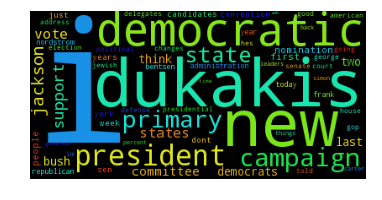

In [25]:
wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

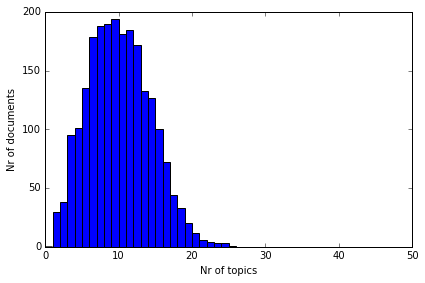

In [26]:
num_topics_used = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(50))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

# We can see that about 150 documents have 5 topics
- while the majority deal with around 10 to 12 of them. 
    - No document talks about more than 20 topics.

In [27]:
# Now, repeat the same exercise using alpha=1.0  
# You can edit the constant below to play around with this parameter
ALPHA = 2.0  #参数
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

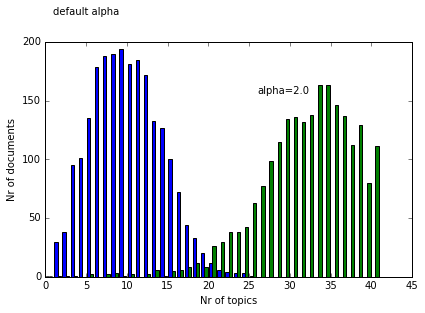

In [28]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
# The coordinates below were fit by trial and error to look good
plt.text(1, 223, r'default alpha')   #(1, 223）文本标记的位置
plt.text(26, 156, 'alpha=2.0')      #alpha最优值
fig.tight_layout()

# 使用pyLDAvis可视化主体模型

# 读取并清洗数据

In [29]:
with open('D:/program/cjc2016/ap/ap.txt', 'r') as f:
    dat = f.readlines()

In [30]:
dat[:6]

['<DOC>\n',
 '<DOCNO> AP881218-0003 </DOCNO>\n',
 '<TEXT>\n',
 " A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Fri

In [31]:
dat[4].strip()[0]

'<'

In [32]:
docs = []
for i in dat[:100]:
    if i.strip()[0] != '<':
        docs.append(i)

In [33]:
def clean_doc(doc):
    doc = doc.replace('.', '').replace(',', '')
    doc = doc.replace('``', '').replace('"', '')
    doc = doc.replace('_', '').replace("'", '')
    doc = doc.replace('!', '')
    return doc
docs = [clean_doc(doc) for doc in docs]

In [34]:
texts = [[i for i in doc.lower().split()] for doc in docs]

In [ ]:
texts

[['a',
  '16-year-old',
  'student',
  'at',
  'a',
  'private',
  'baptist',
  'school',
  'who',
  'allegedly',
  'killed',
  'one',
  'teacher',
  'and',
  'wounded',
  'another',
  'before',
  'firing',
  'into',
  'a',
  'filled',
  'classroom',
  'apparently',
  'just',
  'snapped',
  'the',
  'schools',
  'pastor',
  'said',
  'i',
  'dont',
  'know',
  'how',
  'it',
  'could',
  'have',
  'happened',
  'said',
  'george',
  'sweet',
  'pastor',
  'of',
  'atlantic',
  'shores',
  'baptist',
  'church',
  'this',
  'is',
  'a',
  'good',
  'christian',
  'school',
  'we',
  'pride',
  'ourselves',
  'on',
  'discipline',
  'our',
  'kids',
  'are',
  'good',
  'kids',
  'the',
  'atlantic',
  'shores',
  'christian',
  'school',
  'sophomore',
  'was',
  'arrested',
  'and',
  'charged',
  'with',
  'first-degree',
  'murder',
  'attempted',
  'murder',
  'malicious',
  'assault',
  'and',
  'related',
  'felony',
  'charges',
  'for',
  'the',
  'friday',
  'morning',
  'shoot

In [ ]:
import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
' '.join(stop)

In [ ]:
stop.append('said')

In [ ]:
from collections import defaultdict
frequency = defaultdict(int)   #创建value为整数的字典，value=frequency; key是token
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1 and token not in stop]
        for text in texts]

In [ ]:
docs[8]

In [ ]:
' '.join(texts[9])

In [ ]:
dictionary = corpora.Dictionary(texts)
lda_corpus = [dictionary.doc2bow(text) for text in texts]
#The function doc2bow() simply counts the number of occurences of each distinct word,  token在各个文本中的frequency
# converts the word to its integer word id and returns the result as a sparse vector.  稀疏向量，很多texts的fre是0，在其他文本中。

In [ ]:
lda_corpus    #id2token

In [ ]:
lda_model = models.ldamodel.LdaModel(
    lda_corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha=None)

In [ ]:
import pyLDAvis.gensim

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary)

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [ ]:
pyLDAvis.save_html(ap_data, 'D:/program/cjc2016/homework/techwindge/homework5/ap_ldavis.html')